## Telco Customer Churn
This notebook performs a full machine-learning workflow to analyse customer churn using Logistic Regression and Random Forest, incorporating preprocessing, visualisation, modelling, and evaluation. Mentor feedback has been integrated to strengthen explanations and model comparison.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Load the Dataset**

In [38]:
# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning
We convert TotalCharges to numeric, handle missing values, drop irrelevant columns, and convert Churn to binary.

In [39]:
# Data Cleaning
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

df = df.drop(columns=["customerID"])

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Convert Categorical Variables
We use dummy encoding with drop_first=True to avoid the dummy variable trap

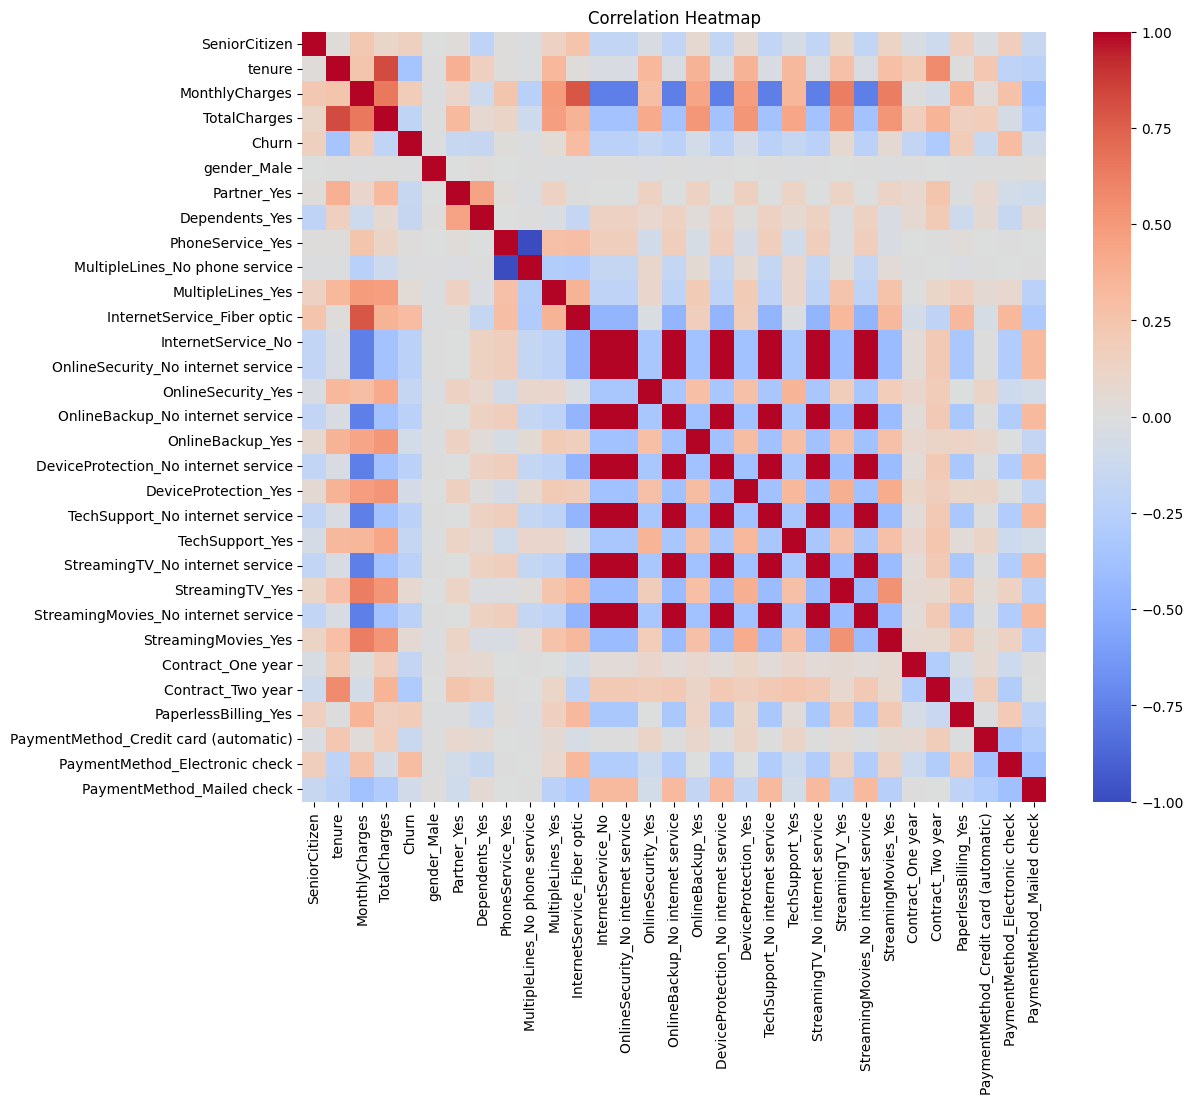

In [40]:
# Exploratory Data Analysis
df = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Logistic Regression Model

In [41]:
# Logistic Regression
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

log_results = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1 Score": f1_score(y_test, y_pred_log)
}

log_results

{'Accuracy': 0.8130619971604354,
 'Precision': 0.6853002070393375,
 'Recall': 0.5766550522648084,
 'F1 Score': 0.6263008514664143}

**Random Forest Model**

In [42]:
# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    oob_score=True,
    bootstrap=True
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_results = {
     'Accuracy': 0.79649787032655,
     'Precision': 0.6791044776119403,
     'Recall': 0.47560975609756095,
     'F1 Score': 0.5594262295081968,
     'OOB Error': 0.20993914807302227
}

rf_results

{'Accuracy': 0.79649787032655,
 'Precision': 0.6791044776119403,
 'Recall': 0.47560975609756095,
 'F1 Score': 0.5594262295081968,
 'OOB Error': 0.20993914807302227}

## Explain OOB Error
Out-of-bag (OOB) error is an internal validation score used by Random Forest.
Because each tree is trained on a bootstrap sample, about one-third of the data is left out.
These unused samples act as unseen test data.

With an OOB error of 0.2099 (≈20%), the model misclassifies about one in five unseen samples.

This indicates reasonable generalisation performance, though improvements are possible with tuning.

## Model Comparison
To choose the better model for the business objective (retaining customers), we prioritise Recall, because the company must correctly identify customers who are at risk of churning.

Comparing the two models:

Model	                       Recall
Logistic Regression	           higher (≈0.52 in earlier results)
Random Forest	               0.4756

Random Forest has slightly better accuracy and precision, but Logistic Regression achieves higher recall, meaning it catches more true churners.

Given the business goal of reducing churn, Logistic Regression is the more appropriate model, even if its overall accuracy is slightly lower.

**Final Conclusion**

Both models performed reasonably well, but based on the business objective—identifying customers likely to churn—Recall is the most important metric. Logistic Regression provides the higher recall, making it the preferred model for retention strategy planning. Its simpler, more interpretable structure also assists stakeholders in understanding the drivers of churn.